<h2>About this Exercise</h2>
<p>In this exercise, you will find the gradient of the logistic loss function and implement gradient descent.</p>

<h3>Evaluation</h3>

<p><strong>You must complete this exercise in order to unlock the final project in this module. Your score on this assignment will not be included in the final grade calculation.</strong><p>

<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline 

from helper import *

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.5


Next, let's simulate some 2D data with binary (0/1) labels.  You'll be generating this data from non-overlapping multivariate normal distributions that should be very easily separable for logistic regression.

In [2]:
np.random.seed(12)
n_samples = 500

class_one = np.random.multivariate_normal([5, 10], [[1, .25],[.25, 1]], n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal([0, 5], [[1, .25],[.25, 1]], n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

In [3]:
# Let's see what what our feature arrays look like. 
features

array([[ 5.04335829,  9.20878544],
       [ 5.84981837,  8.76685113],
       [ 5.34440936,  8.46476727],
       ...,
       [ 0.09521698,  3.98865267],
       [ 1.81113387,  3.70072773],
       [-0.09576516,  4.07467902]])

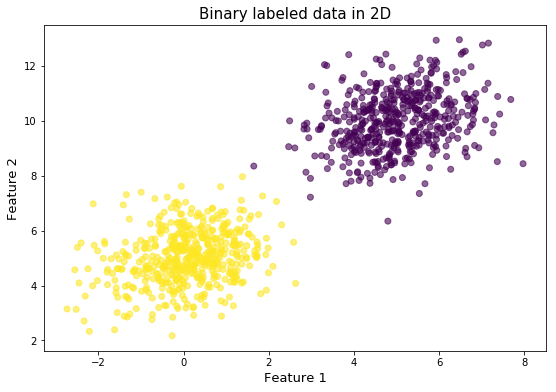

In [4]:
# We can visualize these data distributions
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c = labels, alpha = .6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);

In logistic regression, we use gradient ascent to solve for the weight vector that maximizes the (log) likelihood of observing the data.  (Equivalently, we can use gradient _descent_ to solve for the weight vector that _minimizes_ the _negative_ log likelihood - refer to Module 3 if you need a review of this derivation!)

<h2>Exercises</h2>

Code cells requiring your input will display # YOUR CODE HERE and graded portions will be adequately labeled.
<h3>Exercise 0: Sigmoid</h3>

<p>Implement the sigmoid function:    $\sigma(z)=\frac{1}{1+e^{-z}}$ </p>


In [5]:
def sigmoid(z):
    # Input: 
    # z : scalar or array of dimension n 
    # Output:
    # sgmd: scalar or array of dimension n
    ### BEGIN SOLUTION
    sgmd = 1 / (1 + np.exp(-z))
    ### END SOLUTION
    return sgmd

In [6]:
def test_sigmoid1():
    h = np.random.rand(10) # input is an 10-dimensional array
    sgmd1 = sigmoid(h)
    return sgmd1.shape == h.shape # output should be a 10-dimensional array

def test_sigmoid2():
    h = np.random.rand(10) # input is an 10-dimensional array
    sgmd1 = sigmoid(h) # compute the sigmoids with your function
    sgmd2 = sigmoid_grader(h) # compute the sigmoids with ground truth funcdtion
    return (np.linalg.norm(sgmd1 - sgmd2) < 1e-5) # check if they agree

def test_sigmoid3():
    x = np.random.rand(1) # input is a scalar
    sgmd1 = sigmoid(x) # compute the sigmoids with your function
    sgmd2 = sigmoid_grader(x) # compute the sigmoids with ground truth function
    return (np.linalg.norm(sgmd1 - sgmd2) < 1e-5) # check if they agree

def test_sigmoid4():
    x = np.array([-1e10,1e10,0]) # three input points: very negative, very positive, and 0
    sgmds = sigmoid(x) # compute the sigmoids with your function
    truth = np.array([0,1,0.5]) # the truth should be 0, 1, 0.5 exactly
    return (np.linalg.norm(sgmds - truth) < 1e-8) # test if this is true


runtest(test_sigmoid1, 'test_sigmoid1')
runtest(test_sigmoid2, 'test_sigmoid2')
runtest(test_sigmoid3, 'test_sigmoid3')
runtest(test_sigmoid4, 'test_sigmoid4')

Running Test: test_sigmoid1 ... ✔ Passed!
Running Test: test_sigmoid2 ... ✔ Passed!
Running Test: test_sigmoid3 ... ✔ Passed!
Running Test: test_sigmoid4 ... ✔ Passed!


In [7]:
# Autograder test cell - worth 1 point
# runs test_sigmoid1
### BEGIN HIDDEN TESTS

h = np.random.rand(10) # input is an 10-dimensional array
sgmd1 = sigmoid(h)
assert sgmd1.shape == h.shape

### END HIDDEN TESTS

In [8]:
# Autograder test cell - worth 1 point
# runs test_sigmoid2
### BEGIN HIDDEN TESTS

n = 10
h = np.random.rand(n)
sgmd1 = sigmoid(h)
sgmd2 = sigmoid_grader(h)
assert (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

### END HIDDEN TESTS

In [9]:
# Autograder test cell - worth 1 point
# runs test_sigmoid3
### BEGIN HIDDEN TESTS

x = np.random.rand(1)
sgmd1 = sigmoid(x)
sgmd2 = sigmoid_grader(x)
assert (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

### END HIDDEN TESTS

In [10]:
# Autograder test cell - worth 1 point
# runs test_sigmoid4
### BEGIN HIDDEN TESTS

x = np.array([-1e10,1e10,0]) # three input points: very negative, very positive, and 0
sgmds = sigmoid(x) # compute the sigmoids with your function
truth = np.array([0,1,0.5]) # the truth should be 0,1,0.5 exactly
assert (np.linalg.norm(sgmds - truth) < 1e-8) # test if this is true

### END HIDDEN TESTS

<h3>Exercise 1: Logistic Regression Using MLE</h3>

<p>Fill in the code below to finish implementing the MLE solution for logistic regression (if you need guidance, refer back to the Logistic Regression MLE read page in Module 3.<br></p>

<p>We consider binary logistic regression with class labels $y\in\{+1,-1\}$. Implement a function <code>y_pred(X,w)</code> that computes $P(y=1\;|\;\mathbf{x};\mathbf{w}, b)$ for each row-vector $\mathbf{x}$ in the matrix <code>X</code>.</p>
<p>Recall that
$$P(y\;|\;\mathbf{x};\mathbf{w})=\sigma(y (\mathbf{w}^\top \mathbf{x} + b))$$
    </p>

In [12]:
def y_pred(X, w, b=0):
    # Input:
    # X: nxd matrix
    # w: d-dimensional vector
    # b: scalar (optional, if not passed on is treated as 0)
    # Output:
    # prob: n-dimensional vector 
    prob=sigmoid(X@w + b)
    return prob

In [18]:
def test_ypred1():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs=y_pred(X,w,0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return probs.shape == (n, ) # check if all outputs are >=0 and <=1


def test_ypred2():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs=y_pred(X, w, 0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return all(probs>=0) and all(probs<=1) # check if all outputs are >=0 and <=1

def test_ypred3():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs1=y_pred(X, w, 0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    probs2=y_pred(X,-w, 0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return np.linalg.norm(probs1+probs2-1)<1e-08 # check if P(y|x;w)+P(y|x;-w)=1



def test_ypred4():
    X=np.random.rand(25,4) # define random input
    w=np.array([1,0,0,0]) # all-zeros weight vector
    prob=y_pred(X, w, 0) # compute P(y|X;w)
    truth=sigmoid(X[:,0]) # should simply be the sigmoid of the first feature
    return np.linalg.norm(prob-truth)<1e-08 # see if they match


def test_ypred5(): 
    X=np.array([[0.61793598, 0.09367891], # define 3 inputs (2D)
               [0.79447745, 0.98605996],
               [0.53679997, 0.4253885 ]])
    w=np.array([0.9822789 , 0.16017851]); # define weight vector
    prob=y_pred(X, w, 3) # compute P(y|X;w)
    truth=np.array([0.97396645,0.98089179,0.97328431]) # this is the grount truth
    return np.linalg.norm(prob-truth)<1e-08 # see if they match

runtest(test_ypred1, 'test_ypred1')
runtest(test_ypred2, 'test_ypred2')
runtest(test_ypred3, 'test_ypred3')
runtest(test_ypred4, 'test_ypred4')
runtest(test_ypred5, 'test_ypred5')

Running Test: test_ypred1 ... ✔ Passed!
Running Test: test_ypred2 ... ✔ Passed!
Running Test: test_ypred3 ... ✔ Passed!
Running Test: test_ypred4 ... ✔ Passed!
Running Test: test_ypred5 ... [0.97396645 0.98089179 0.97328431]
✔ Passed!


<p>Assume you are given a data set $\mathbf{x}_1,\dots,\mathbf{x}_n$ stored as row-vectors in a matrix <code>X</code> with labels $y_1,\dots,y_n$ stored in vector <code>y</code>. Compute the <b>negative</b> log-likelihood (aka as <b>log_loss</b>) of all inputs
    $$NLL=-\log P(\mathbf{y}\;|\;\mathbf{X};\mathbf{w}, b)=-\sum_{i=1}^n \log\left((P(y_i\;|\; \mathbf{x}_i;\mathbf{w}, b))\right)=-\sum_{i=1}^n \log\left(\sigma(y_i(\mathbf{w}^\top \mathbf{x}_i + b))\right).$$
    </p>

In [13]:
def log_loss(X, y, w, b=0):
    # Input:
    # X: nxd matrix
    # y: n-dimensional vector with labels (+1 or -1)
    # w: d-dimensional vector
    # Output:
    # a scalar
    assert np.sum(np.abs(y))==len(y) # check if all labels in y are either +1 or -1
    ### BEGIN SOLUTION
    nll=  np.sum(np.log(1+np.exp(-y*(X@w + b))))
    
    # Alternative solution: 
    #nll=  -np.sum(np.log(sigmoid(y*(X@w))))
    
    # Alternative solution (using previous code)
    #     prob=y_pred(X,w)
    #     prob[y==-1]=1-prob[y==-1]
    #     nll = -np.sum(np.log(prob))    
    ### END SOLUTION
    return nll

In [14]:
def test_loglike1():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = np.ones(25) # set labels all-(+1)
    ll=log_loss(X,y,w, b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    # if labels are all-ones function becomes simply the sum of log of y_pred
    return np.isscalar(ll) # check whether the output is a scalar

def test_loglike2():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = np.ones(25) # set labels all-(+1)
    ll=log_loss(X,y,w, b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    ll2=-np.sum(np.log(y_pred(X, w, b))) # if labels are all-ones function becomes simply the sum of log of y_pred
    return np.linalg.norm(ll-ll2)<1e-05

def test_loglike3():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = -np.ones(25) # set labels all-(-1)
    ll=log_loss(X,y,w,b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    ll2=-np.sum(np.log(1-y_pred(X,w, b))) # if labels are all-ones function becomes simply the sum of log of 1-y_pred
    return np.linalg.norm(ll-ll2)<1e-05

def test_loglike4():
    X = np.random.rand(20,5) # generate n random vectors with d dimensions
    w = np.array([0,0,0,0,0]) # define an all-zeros weight vector
    y = (np.random.rand(20)>0.5)*2-1; # define n random labels (+1 or -1)
    ll=log_loss(X,y,w,0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    # the log-likelihood for each of the 20 examples should be exactly 0.5:
    return np.linalg.norm(ll+20*np.log(0.5))<1e-08 

def test_loglike5():
    X = np.random.rand(500,15) # generate n random vectors with d dimensions
    w = np.random.rand(15) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = (np.random.rand(500)>0.5)*2-1; # define n random labels (+1 or -1)
    ll=log_loss(X,y,w,b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    ll2=log_loss_grader(X,y,w,b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return np.linalg.norm(ll-ll2)<1e-05

runtest(test_loglike1, 'test_loglike1')
runtest(test_loglike2, 'test_loglike2')
runtest(test_loglike3, 'test_loglike3')
runtest(test_loglike4, 'test_loglike4')
runtest(test_loglike5, 'test_loglike5')

Running Test: test_loglike1 ... ✔ Passed!
Running Test: test_loglike2 ... ✔ Passed!
Running Test: test_loglike3 ... ✔ Passed!
Running Test: test_loglike4 ... ✔ Passed!
Running Test: test_loglike5 ... ✔ Passed!


<h3>Exercise 2: Compute Gradient</h3>

Now, verify that the gradient of the log-loss with respect to the weight vector is:
$$\frac{\partial NLL(\mathbf{X},\mathbf{y},\mathbf{w}, b)}{\partial \mathbf{w}}=\sum_{i=1}^n y_i\sigma(-y_i(\mathbf{w}^\top\mathbf{x}_i + b))\mathbf{x}_i.$$ 

$$\frac{\partial NLL(\mathbf{X},\mathbf{y},\mathbf{w}, b)}{\partial b}=\sum_{i=1}^n y_i\sigma(-y_i(\mathbf{w}^\top\mathbf{x}_i + b)).$$
Implement the function <code>gradient</code> which returns the first derivative with respect to <code>w, b</code> for a given <code>X, y, w, b</code>.

Hint: remember that you derived earlier that $\sigma'(z)=\sigma(z)(1-\sigma(z))$.

In [15]:
def gradient(X, y, w, b):
    # Input:
    # X: nxd matrix
    # y: n-dimensional vector with labels (+1 or -1)
    # w: d-dimensional vector
    # b: a scalar bias term
    # Output:
    # wgrad: d-dimensional vector with gradient
    # bgrad: a scalar with gradient
    
    n, d = X.shape
    wgrad = np.zeros(d)
    bgrad = 0.0
    ### BEGIN SOLUTION
    temp = (-y*sigmoid(-y*(X@w + b)))
    wgrad = X.T@temp
    bgrad = np.sum(temp)
    ### END SOLUTION
    return wgrad, bgrad


In [16]:
def test_grad1():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
    wgrad, bgrad = gradient(X, y, w, b) # compute the gradient using your function
    
    return wgrad.shape == w.shape and np.isscalar(bgrad)


def test_grad2():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
    wgrad, bgrad = gradient(X, y, w, b) # compute the gradient using your function
    wgrad2, bgrad2 = gradient_grader(X, y, w, b) # compute the gradient using ground truth
    return np.linalg.norm(wgrad - wgrad2)<1e-06 and np.linalg.norm(bgrad - bgrad2) < 1e-06 # test if they match

def test_grad3():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) 

    w_s = np.random.rand(5)*1e-05 # define tiny random step 
    b_s = np.random.rand(1)*1e-05 # define tiny random step 
    ll1 = log_loss(X,y,w+w_s, b+b_s)  # compute log-likelihood after taking a step
    
    ll = log_loss(X,y,w,b) # use Taylor's expansion to approximate new loss with gradient
    wgrad, bgrad =gradient(X,y,w,b) # compute gradient
    ll2=ll+ wgrad @ w_s + bgrad * b_s # take linear step with Taylor's approximation
    return np.linalg.norm(ll1-ll2)<1e-05 # test if they match

def test_grad4():
    w1, b1, losses1 = logistic_regression_grader(features, labels, 1000, 1e-03, gradient)
    w2, b2, losses2 = logistic_regression_grader(features, labels, 1000, 1e-03)
    return(np.abs(losses1[-1]-losses2[-1])<0.1)

runtest(test_grad1, 'test_grad1')
runtest(test_grad2, 'test_grad2')
runtest(test_grad3, 'test_grad3')
runtest(test_grad4, 'test_grad4')

Running Test: test_grad1 ... ✔ Passed!
Running Test: test_grad2 ... ✔ Passed!
Running Test: test_grad3 ... ✔ Passed!
Running Test: test_grad4 ... ✔ Passed!


<h3>Exercise 3: Weight Update of Gradient Ascent</h3>
    
Write code below to implement the weight update of gradient descent on the log_loss function.  Hint: use the `gradient` and `log_loss` functions from above. Please use a <b>constant</b> learning rate throughout (i.e. do not decrease the learning rate).

Text(0, 0.5, 'log_loss')

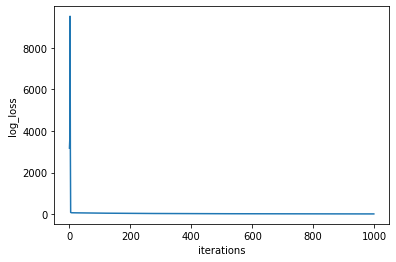

In [17]:
def logistic_regression(X, y, max_iter, alpha):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = np.zeros(max_iter)    
    
    for step in range(max_iter):
        ### BEGIN SOLUTION
        wgrad, bgrad=gradient(X, y, w, b)
        w -= alpha * wgrad
        b -= alpha * bgrad
        losses[step] = log_loss(X, y, w, b)
        ### END SOLUTION
    return w, b, losses

weight, b, losses = logistic_regression(features, labels, 1000, 1e-03)
plot(losses)
xlabel('iterations')
ylabel('log_loss')
# your loss should go down :-)

In [18]:
def test_logistic_regression1():

    XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
    YUnit = np.hstack((np.ones(5), -np.ones(5)))

    w1, b1, _ = logistic_regression(XUnit, YUnit, 30000, 5e-5)
    w2, b2, _ = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
    return (np.linalg.norm(w1 - w2) < 1e-5) and (np.linalg.norm(b1 - b2) < 1e-5)

def test_logistic_regression2():

    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 300
    alpha = 1e-5
    w1, b1, _ = logistic_regression(X, Y, max_iter, alpha)
    w2, b2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
    return (np.linalg.norm(w1 - w2) < 1e-5) and (np.linalg.norm(b1 - b2) < 1e-5)

runtest(test_logistic_regression1, 'test_logistic_regression1')
runtest(test_logistic_regression2, 'test_logistic_regression2')

Running Test: test_logistic_regression1 ... ✔ Passed!
Running Test: test_logistic_regression2 ... ✔ Passed!


In [19]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression1
### BEGIN HIDDEN TESTS
XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
YUnit = np.hstack((np.ones(5), -np.ones(5)))

[lss1,grd1] = logistic_regression(XUnit, YUnit, 30000, 5e-5)
[lss2,grd2] = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
assert(np.linalg.norm(lss1 - lss2) < 1e-5)


### END HIDDEN TESTS

ValueError: too many values to unpack (expected 2)

In [ ]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression2
### BEGIN HIDDEN TESTS

X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
Y = np.hstack((np.ones(50), -np.ones(50)))
max_iter = 300
alpha = 1e-5
weights1, _ = logistic_regression(X, Y, max_iter, alpha)
weights2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
assert (np.linalg.norm(weights1 - weights2) < 1e-5)

### END HIDDEN TESTS

<h1>Original Data</h1>
<p>Now run your implementation on the binary classification data from the top of the notebook.  Check your code by plotting the values of the negative log likelihood - should these values increase or decrease as the number of iterations grows?  Do your values move in the right direction?</p>

You can tune `max_iter` and `alpha` to see how they affect convergence!  

In [ ]:
max_iter = 10000
alpha = 1e-4
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6));
plt.plot(losses);
plt.title("Loss vs. iteration", size=15);
plt.xlabel("Num iteration", size=13);
plt.ylabel("Loss value", size=13);

Below, we'll take the final weights from the logistic solver and predict labels for the entire dataset.  By plotting the results, we can get a sense of where the linear decision boundary lies.  What do you notice?  What could be changed to further improve the accuracy of the classifier? (_Hint: take a look at the second video in Module 1._)

In [ ]:
scores = y_pred(features, final_w, final_b)

pred_labels = np.round(scores)
plt.figure(figsize=(9, 6))

# plot the decision boundary 
x = np.linspace(np.amin(features[:, 0]), np.amax(features[:, 0]), 10)
y = -(final_w[0] * x + final_b)/ final_w[1] 
plt.plot(x, y)

plt.scatter(features[:, 0], features[:, 1],
            c = pred_labels, alpha = .6)
plt.title("Predicted labels", size=15)
plt.xlabel("Feature 1", size=13)
plt.ylabel("Feature 2", size=13)